<a href="https://colab.research.google.com/github/rakshgopidi/INDE577/blob/main/Reinforcement%20Learning/ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cmake 'gym[atari]' scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.0 MB/s eta 0:00:00


In [2]:
!pip install pygame 

import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
pygame 2.3.0 (SDL 2.24.2, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


<Surface(640x480x32 SW)>

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode: 100, Steps: 200, Penalties: 56, Epsilon: 0.90
Episode: 200, Steps: 200, Penalties: 55, Epsilon: 0.82
Episode: 300, Steps: 199, Penalties: 44, Epsilon: 0.74
Episode: 400, Steps: 200, Penalties: 44, Epsilon: 0.67
Episode: 500, Steps: 29, Penalties: 10, Epsilon: 0.61
Episode: 600, Steps: 200, Penalties: 35, Epsilon: 0.55
Episode: 700, Steps: 56, Penalties: 6, Epsilon: 0.50
Episode: 800, Steps: 41, Penalties: 5, Epsilon: 0.45
Episode: 900, Steps: 55, Penalties: 6, Epsilon: 0.41
Episode: 1000, Steps: 94, Penalties: 11, Epsilon: 0.37
Episode: 1100, Steps: 73, Penalties: 9, Epsilon: 0.33
Episode: 1200, Steps: 28, Penalties: 2, Epsilon: 0.30
Episode: 1300, Steps: 18, Penalties: 4, Epsilon: 0.27
Episode: 1400, Steps: 31, Penalties: 2, Epsilon: 0.25
Episode: 1500, Steps: 68, Penalties: 4, Epsilon: 0.22
Episode: 1600, Steps: 13, Penalties: 1, Epsilon: 0.20
Episode: 1700, Steps: 13, Penalties: 0, Epsilon: 0.18
Episode: 1800, Steps: 37, Penalties: 1, Epsilon: 0.17
Episode: 1900, Steps: 62,

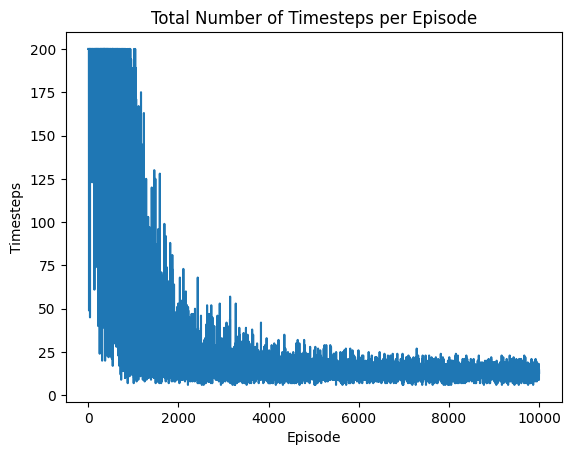

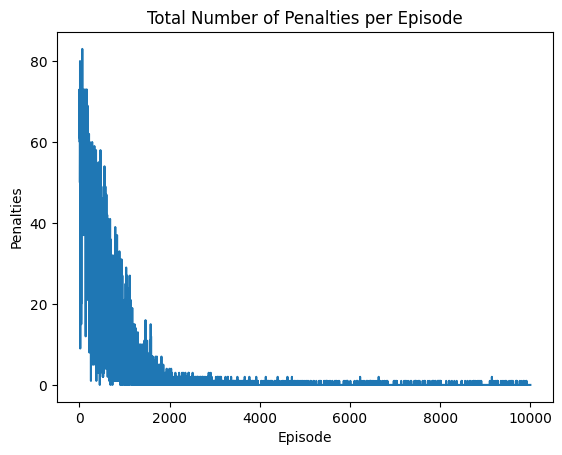

Evaluation complete.
Average steps per episode: 29.83
Average penalties per episode: 0.00


In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the environment
env = gym.make('Taxi-v3')

# Initialize Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Set hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999

# Initialize lists to store performance metrics
steps_per_episode = []
penalties_per_episode = []

# Train the agent
for episode in range(1, 10000):
    state = env.reset()
    done = False
    steps = 0
    penalties = 0

    while not done:
        # Choose action
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)

        # Update Q-value
        q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]))

        # Update state and counters
        state = next_state
        steps += 1

        if reward == -10:
            penalties += 1

    # Update epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Append performance metrics to lists
    steps_per_episode.append(steps)
    penalties_per_episode.append(penalties)

    # Print progress
    if episode % 100 == 0:
        print("Episode: {}, Steps: {}, Penalties: {}, Epsilon: {:.2f}".format(episode, steps, penalties, epsilon))

print("Training complete.")

# Plot performance metrics
plt.plot(steps_per_episode)
plt.title('Total Number of Timesteps per Episode')
plt.xlabel('Episode')
plt.ylabel('Timesteps')
plt.show()

plt.plot(penalties_per_episode)
plt.title('Total Number of Penalties per Episode')
plt.xlabel('Episode')
plt.ylabel('Penalties')
plt.show()

# Evaluate the agent
total_steps = 0
total_penalties = 0
episodes = 100

for episode in range(episodes):
    state = env.reset()
    done = False
    steps = 0
    penalties = 0

    while not done:
        # Choose action
        action = np.argmax(q_table[state])

        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)

        # Update counters
        if reward == -10:
            penalties += 1
        steps += 1
        state = next_state

    total_steps += steps
    total_penalties += penalties

# Print results
print("Evaluation complete.")
print("Average steps per episode: {:.2f}".format(total_steps / episodes))
print("Average penalties per episode: {:.2f}".format(total_penalties / episodes))
